In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

DATASET_PATH = "datasets/"

def load_song_data(dataset_path=DATASET_PATH):
    df = pd.read_csv(dataset_path + 'year-prediction-msd-train.txt', sep=",", header=None)
    return df

In [2]:
#songs é um DataFrame
songs = load_song_data()

In [3]:
songs_x = songs.iloc[:,1:2]
songs_y = songs.iloc[:,0]
#songs_x = songs_x.values.reshape(-1,1)
#songs_y = songs_y.values.reshape(-1,1)

In [4]:
#Normalizing
pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])
songs_x_prepared = pipeline.fit_transform(songs_x)

In [5]:
# Split the data using train_test_split
songs_x_train, songs_x_test, songs_y_train, songs_y_test = train_test_split(songs_x_prepared, songs_y, test_size=0.045, random_state=0)
songs_x_test = np.sort(songs_x_test[:,0])
songs_x_test = songs_x_test.reshape(-1,1)

RMSE Erro para grau 1 : 11.2544614695
RMSE Erro para grau 2 : 11.3292029869
RMSE Erro para grau 3 : 11.3289519359
RMSE Erro para grau 4 : 11.329646234
RMSE Erro para grau 5 : 11.332215732


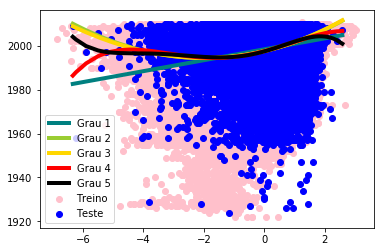

In [6]:
colors = ['teal', 'yellowgreen', 'gold', 'red', 'black']

for count, degree in enumerate([1, 2, 3, 4, 5]):
    regr = make_pipeline(PolynomialFeatures(degree), Ridge())
    regr.fit(songs_x_train, songs_y_train)
    songs_y_pred = regr.predict(songs_x_test)
    songs_y_pred.astype(int)
    mse=mean_squared_error(songs_y_test, songs_y_pred)
    rmse=np.sqrt(mse)
    print('RMSE Erro para grau',degree,':', rmse)
    plt.plot(songs_x_test, songs_y_pred, color=colors[count], linewidth=4, label="Grau %d" % degree)

plt.scatter(songs_x_train, songs_y_train,  color='pink', label="Treino")
plt.scatter(songs_x_test, songs_y_test,  color='blue', label="Teste")

plt.legend(loc='lower left')
plt.show()